In [86]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

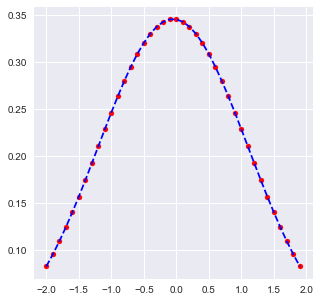

In [87]:
# How to draw Normal distribution

def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

# To generate an array of x
x = np.arange(-2, 2, 0.1)
y = pdf(x)

#plotting the normal curve / bell curve or gussian distribution

plt.style.use('seaborn')
plt.figure(figsize=(5,5))

plt.plot(x, y, color= 'blue', linestyle = 'dashed')

plt.scatter(x, y, marker='o', s=25, color='red')

# Normal Distribution and its tests
1. import datasets
2. subsetting a dataset
3. visual test for normal distribution
   1. histogram
   2. qq-norm plot
4. statistical test
   1. 

In [88]:
# import a dataset
ship = sns.load_dataset('titanic')
ship.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [89]:
ship = ship[['sex', 'age', 'fare']]
ship.head()

,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


<AxesSubplot:ylabel='Count'>

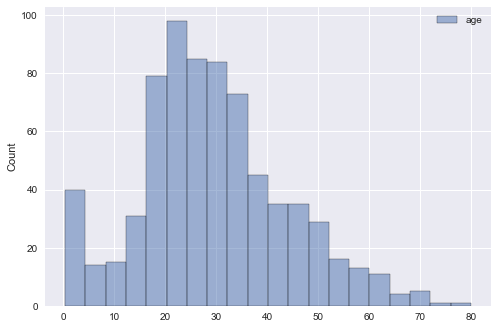

In [90]:
# Histogram test
sns.histplot(ship[['age']])

In [91]:
pip install statsmodels

You should consider upgrading via the 'C:\Users\Quantum\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


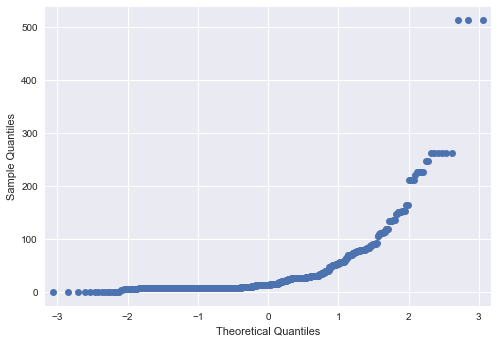

In [92]:
# qq plot 
from statsmodels.graphics.gofplots import qqplot

# q-q norm plot
qqplot(ship['fare'])
plt.show()

# 1. Normality Tests
There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution.
Each test makes differnt assumptions and considers differnt aspects of the data.
We will look at 3 commonly used tests in this section that you can apply own data samples.

1. Shapiro-wilk Test
2. D'Agostino's k^2 Test
3. Anderson-Darling Test
>** p<= alpha:reject HO, not nomal.**\
>** p>= alpha: fail to rejectHO, normal**

# 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian Distribution,named for Samuel Shapiro Wilk.
In practice, the shapiro-wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g.thousands of observations or fewer.
The Shapiro() scipy function will calculate the shapiro- wilk on a given dataset.The funation returns both the W-statistics calculated by the test and the p-value.

### Assumptions
 . Observations in each sample are independent and identically distributed.
### Interpretation
 . HO: the sample has a Gaussian Distribution.
 . H1: the sample does not have a Gaussian distribution.
 

In [93]:
# shapirowilk test

#import library
from scipy.stats import shapiro

stat, p = shapiro(ship['age'])

print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distributin')    

stat=nan, p=1.000
Probably Gaussian or Normal Distribution


### 2. D'agostino's k^2 Test
the D'Agostino's k^2 test calculates summary statistics from the data, namly kutosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D'Agostiono.
- **skew** is a quantification of how much a distribution is pushed left or right , a measure of asymmetry in the distribution.
- **kurtosis** quantifies how much of the distribution is in the tail.it is a simple and commly used statistical test for normality.
  
The D'Agostino's k^2 test is avaiable via the normalitytest() Scipy function and returns the test statistics and the p-value.

**Assumptions**
- Observations in each sample are independent and identically distributed.
  
**Interpretation**
 - H0: The sample has a Gaussian Distribution.
 - H1: The sample does not have a Gussian Distribution.
 

In [94]:
#  D'Agostino's k^2 test

#import library
from scipy.stats import normaltest

stat, p = normaltest(ship['age'])

print('stat=%.3f, p=%.3f' % (stat, p))

# make a conditional argument for futher use 
if p > 0.05:
    print('Probably Gaussian or Normal Distribution')
else:
    print('probably not Gussian nor Normal Distributin')  

stat=nan, p=nan
probably not Gussian nor Normal Distributin


### 3. Anderson-Darling Test
A statistical test that can be used to evaluate wether a data sample comes from 1 of among many known data samples, named for Theodore Anderson and Donald Darling.

it can be used to check whether a data sample is normal.The test is a modified version of more sophisticted nonparametric goodness-of-fit statistical test czlled the kolmogorov-sMIRNOV TEST

A feature of the Anderson-Darling test is that it returns a list of critical values rather then a single p-value.This can provide the basic for more thorough interpretation of result.

The anderson's()Scipy Function implements the Anderson-Darling test.it takes as parameters the data samples and the name of the distribution to test it against.By default , the test will check against the Gaussian Distribution(dist='norm') 

**Assumptions**
- Observations in each sample are independent and identically distributed.
  
**Interpretation**
 - H0: The sample has a Gaussian Distribution.
 - H1: The sample does not have a Gussian Distribution.

In [96]:
from scipy.stats import anderson

# select a column to check the normal distribution
result = anderson(ship["age"])
print('stat=%3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian/Normal Distribution at the %.1f%% level' % (sl))
    else:
         print('Probably not Gaussian/Normal Distribution at the %.1f%% level' % (sl))   

stat=nan
Probably not Gaussian/Normal Distribution at the 15.0% level
Probably not Gaussian/Normal Distribution at the 10.0% level
Probably not Gaussian/Normal Distribution at the 5.0% level
Probably not Gaussian/Normal Distribution at the 2.5% level
Probably not Gaussian/Normal Distribution at the 1.0% level
